In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns
import statistics as st
import warnings
import matplotlib.pyplot as plt
import json
import tabulate
warnings.filterwarnings("ignore")

In [5]:
bank_churn_data=pd.read_csv("Original_Bank_Churn_Data.csv")
bank_churn_data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Region,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,England,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,Northern Ireland,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,England,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,Wales,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,England,21,5,1,0,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,England,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,England,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,England,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,England,36,4,3,3,5281.0,0,5281.0,8395,62,0.000


In [6]:
bank_churn_data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10067.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.382245,2.787400,35.928409,3.812580,2.341167,2.455317,8703.180550,1162.814061,7469.139637,4404.086304,64.858695,0.274894
std,3.690378e+07,8.341393,6.479135,7.986416,1.554408,1.010622,1.106225,9190.058902,814.987335,9090.685324,3397.129254,23.472570,0.275691
min,7.080821e+08,18.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.500000,359.000000,1324.500000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4557.000000,1276.000000,3474.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11127.500000,1784.000000,9859.000000,4741.000000,81.000000,0.503000
max,8.283431e+08,89.000000,143.000000,56.000000,6.000000,6.000000,6.000000,34664.000000,2517.000000,34516.000000,18484.000000,139.000000,0.999000


In [7]:
bank_churn_data.isnull().sum()

CLIENTNUM                     0
Attrition_Flag                0
Customer_Age                  0
Gender                        0
Dependent_count               0
Education_Level               0
Marital_Status                0
Income_Category               0
Card_Category               132
Region                        0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                 60
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Trans_Amt               0
Total_Trans_Ct                0
Avg_Utilization_Ratio         0
dtype: int64

Imputing mode value in "Card_Category" column.

In [8]:
card_category_mode=bank_churn_data["Card_Category"].mode().values[0]
card_category_mode

'Blue'

In [9]:
bank_churn_data["Card_Category"].fillna(value=card_category_mode,inplace=True)

In [10]:
bank_churn_data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Region,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,England,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,Northern Ireland,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,England,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,Wales,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,England,21,5,1,0,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,England,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,England,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,England,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,England,36,4,3,3,5281.0,0,5281.0,8395,62,0.000


In [11]:
credit_limit_median=bank_churn_data["Credit_Limit"].median()
credit_limit_median

4557.0

Imputing median values to "Credit Limit" Column

In [12]:
bank_churn_data["Credit_Limit"].fillna(credit_limit_median,inplace=True)

In [13]:
bank_churn_data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Region                      0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
Total_Trans_Ct              0
Avg_Utilization_Ratio       0
dtype: int64

In [14]:
bank_churn_data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Region,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,England,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,Northern Ireland,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,England,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,Wales,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,England,21,5,1,0,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,England,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,England,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,England,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,England,36,4,3,3,5281.0,0,5281.0,8395,62,0.000


In [15]:
def separating_columns(list_col):
    cat_col=[]
    num_col=[]
    for i in list_col:
        if (bank_churn_data[i]).nunique()<20:
            cat_col.append(i)
        else:
            num_col.append(i)
    return cat_col,num_col

categorical_col,numerical_col=separating_columns(bank_churn_data.columns)

tab_form=tabulate.tabulate({"a":categorical_col,"b":numerical_col},
                  headers=["Categorical Column","Continuous Column"]) 
print(tab_form)

Categorical Column        Continuous Column
------------------------  ---------------------
Attrition_Flag            CLIENTNUM
Gender                    Customer_Age
Education_Level           Dependent_count
Marital_Status            Months_on_book
Income_Category           Credit_Limit
Card_Category             Total_Revolving_Bal
Region                    Avg_Open_To_Buy
Total_Relationship_Count  Total_Trans_Amt
Months_Inactive_12_mon    Total_Trans_Ct
Contacts_Count_12_mon     Avg_Utilization_Ratio


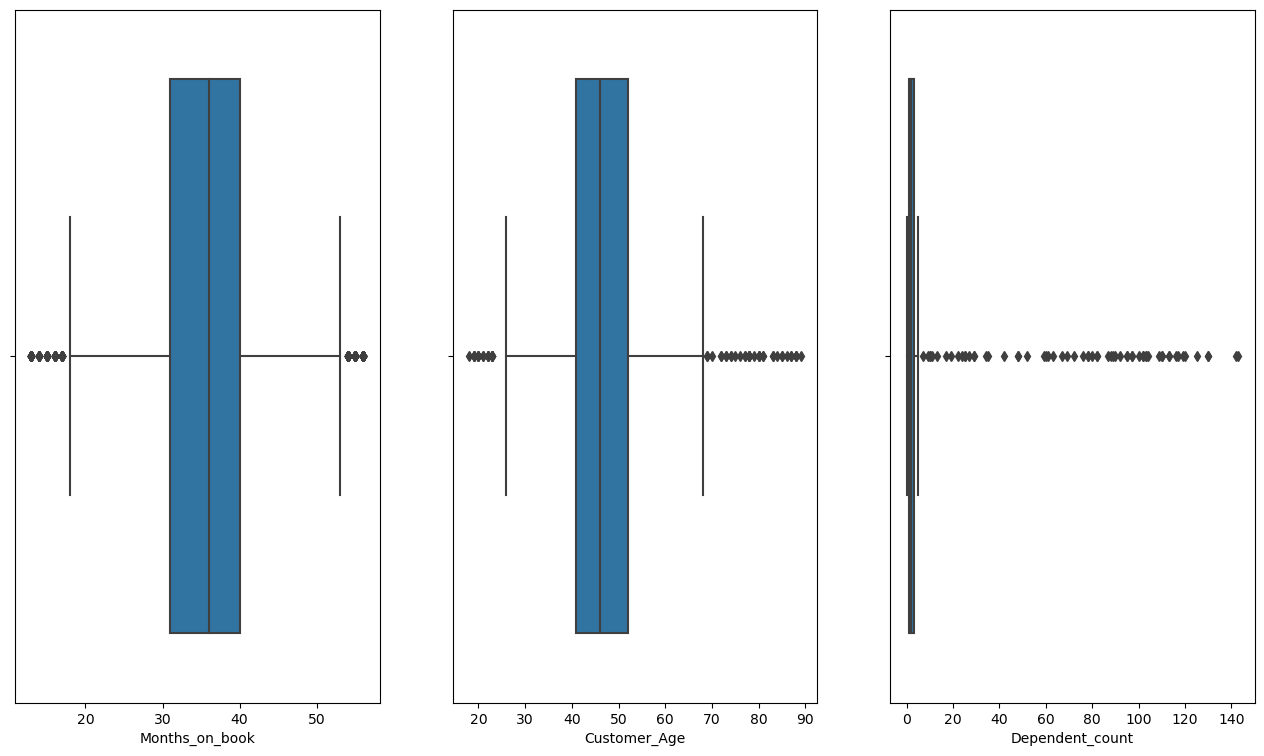

In [16]:
fig,ax=plt.subplots(1,3,figsize=(16,9))
sns.boxplot(x=bank_churn_data["Months_on_book"],data=bank_churn_data,ax=ax[0])

sns.boxplot(x=bank_churn_data["Customer_Age"],data=bank_churn_data,ax=ax[1])

sns.boxplot(x=bank_churn_data["Dependent_count"],data=bank_churn_data,ax=ax[2])

plt.show()

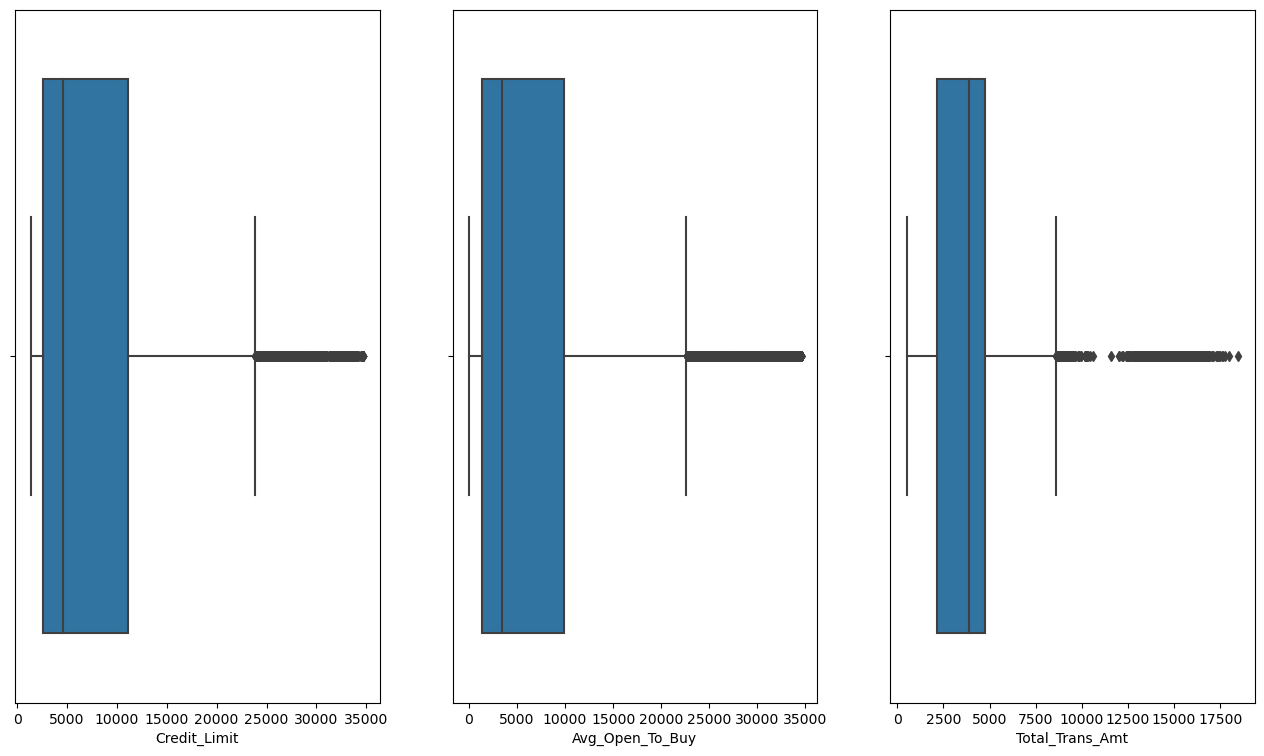

In [17]:
fig,ax=plt.subplots(1,3,figsize=(16,9))
sns.boxplot(x=bank_churn_data["Credit_Limit"],data=bank_churn_data,ax=ax[0])

sns.boxplot(x=bank_churn_data["Avg_Open_To_Buy"],data=bank_churn_data,ax=ax[1])

sns.boxplot(x=bank_churn_data["Total_Trans_Amt"],data=bank_churn_data,ax=ax[2])

plt.show()

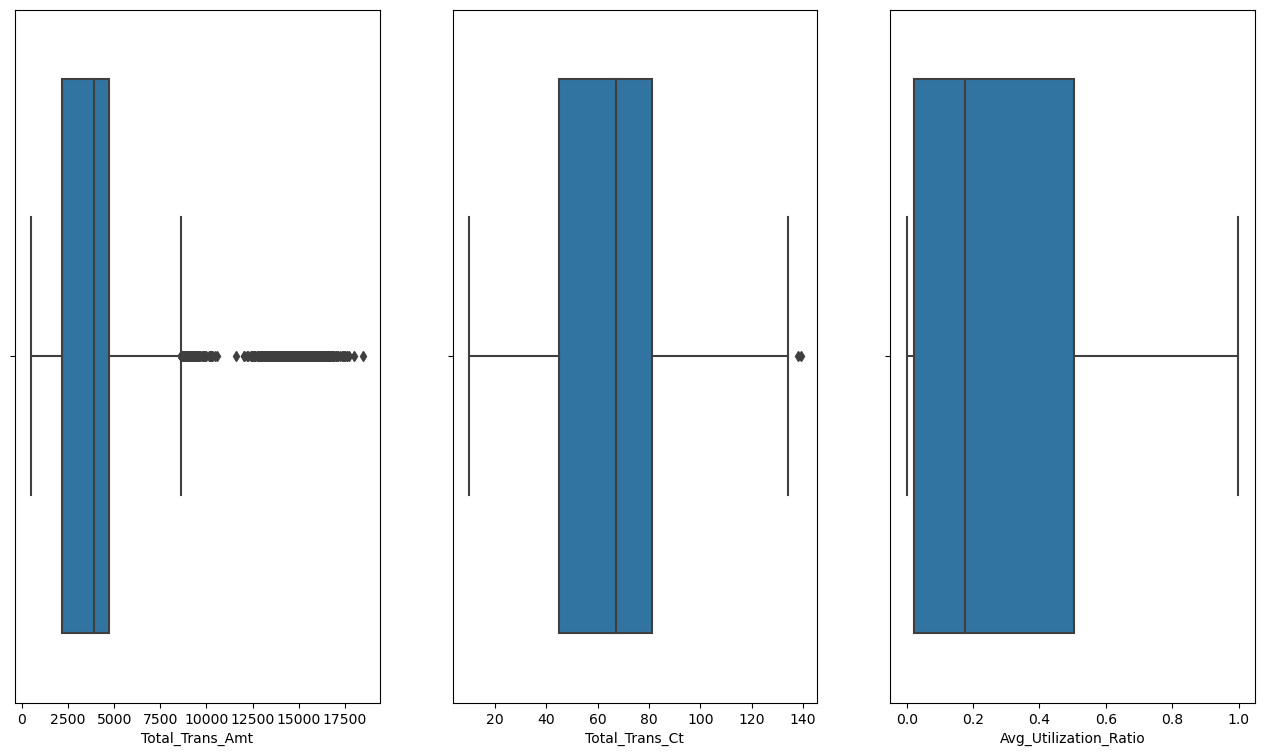

In [16]:
fig,ax=plt.subplots(1,3,figsize=(16,9))
sns.boxplot(x=bank_churn_data["Total_Trans_Amt"],data=bank_churn_data,ax=ax[0])

sns.boxplot(x=bank_churn_data["Total_Trans_Ct"],data=bank_churn_data,ax=ax[1])

sns.boxplot(x=bank_churn_data["Avg_Utilization_Ratio"],data=bank_churn_data,ax=ax[2])

plt.show()

## Outliers are in :
 
 
 

 1)'Customer_Age',

 2)Dependent_count',

 3)'Months_on_book',
 
 4)'Months_Inactive_12_mon',
 
 5)'Contacts_Count_12_mon',
 
 6)'Credit_Limit',
 
 7)'Total_Revolving_Bal',
 
 8)'Avg_Open_To_Buy',
 
 9)'Total_Trans_Amt',
 
 10)'Total_Trans_Ct',
 
 

In [44]:
clean_data=bank_churn_data.copy()

In [45]:
#removing outliers from the column which are important for analysis
outlier_columns=['Customer_Age','Dependent_count','Months_on_book','Months_Inactive_12_mon',
                 'Contacts_Count_12_mon','Credit_Limit',
                 'Total_Revolving_Bal','Avg_Open_To_Buy','Total_Trans_Amt','Total_Trans_Ct',]

for i in outlier_columns:
    lf,uf=removing_outlier_using_iqr(i)
    clean_data=clean_data.loc[(clean_data[i]>=lf) & (clean_data[i]<=uf)]
    

In [ ]:
clean_data.to_csv("C:\\Users\\Kunal\\OneDrive\\Desktop\\NIIT (DS)\\Course 8\\Tableau\\Clean_bank_churn_data.csv"
                  ,index=False)

In [46]:
clean_data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Region,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,England,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,Northern Ireland,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,Wales,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,Wales,36,3,1,2,4010.0,1247,2763.0,1088,24,0.311
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,England,36,6,3,3,11656.0,1677,9979.0,1441,32,0.144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10052,714684108,Attrited Customer,31,M,1,Post-Graduate,Single,$40K - $60K,Blue,Scotland,24,4,2,4,4169.0,534,3635.0,8565,70,0.128
10067,717390408,Attrited Customer,49,F,4,Uneducated,Married,$40K - $60K,Blue,Scotland,36,5,2,3,4167.0,0,4167.0,7590,87,0.000
10089,720328983,Attrited Customer,52,F,5,Unknown,Married,Less than $40K,Blue,England,36,4,3,3,9611.0,0,9611.0,7636,64,0.000
10119,716893683,Attrited Customer,55,F,3,Uneducated,Single,Unknown,Blue,Scotland,47,4,3,3,14657.0,2517,12140.0,6009,53,0.172


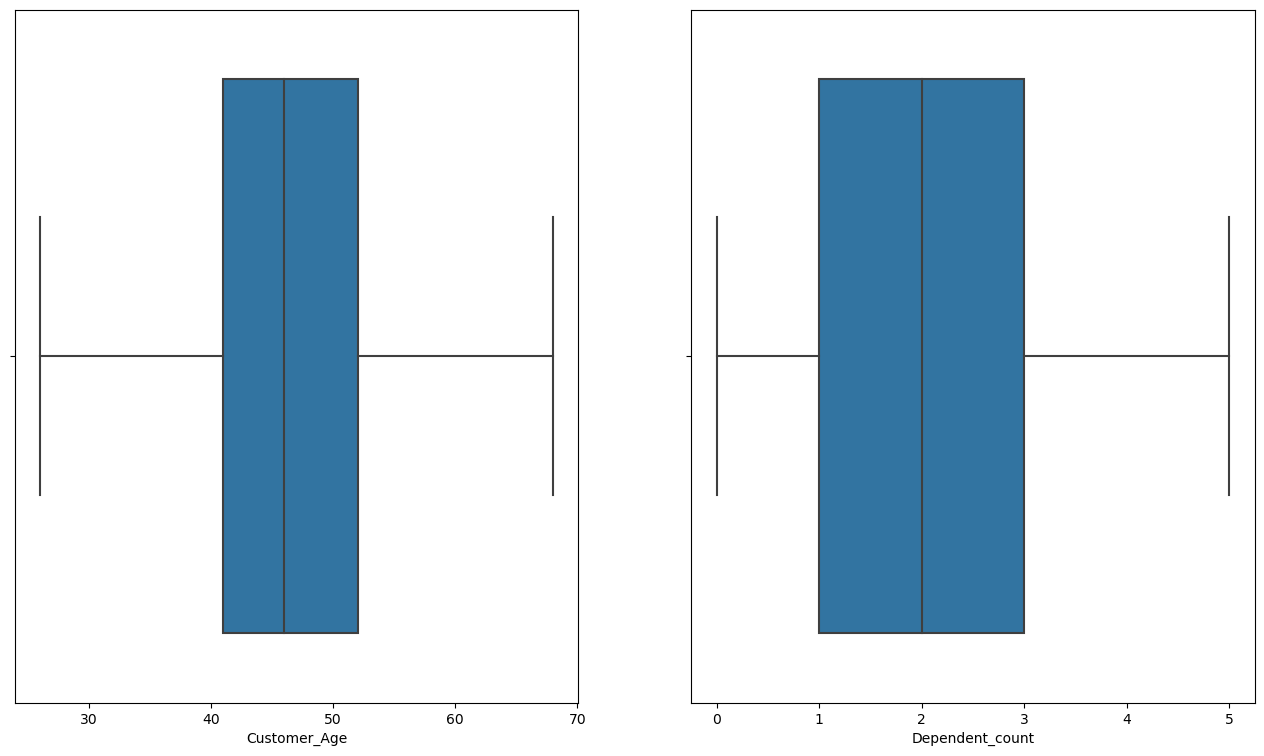

In [47]:
fig,ax=plt.subplots(1,2,figsize=(16,9))

sns.boxplot(x=clean_data["Customer_Age"],data=clean_data,ax=ax[0])

sns.boxplot(x=clean_data["Dependent_count"],data=clean_data,ax=ax[1])

plt.show()

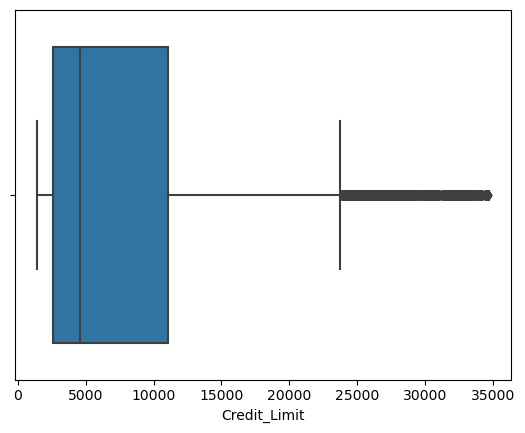

In [41]:
sns.boxplot(x=clean_data["Credit_Limit"],data=clean_data)
plt.show()

This means the data is skewed hence we can see datapoints outside whisker even after removing outlier

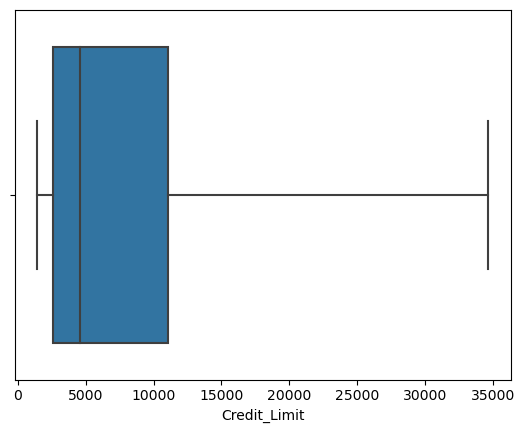

In [33]:
sns.boxplot(clean_data["Credit_Limit"],data=clean_data,whis=1.5*math.exp(3*0.58))
plt.show()

This is how roughly box plot will look like if were to apply "Adjust Boxplot" concept. Though the above boxplot 
does is not entirely correct.